# Лабораторная работа №3. 
## Митрофанов Антон, группа м4121


Возможный план, близкий к изложенному в третьей лекции. Любыми известными способами осуществить построение импульсной и переходной характеристик, амплитудно-частотной и фазочастотной характеристик КИХ- и БИХ-фильтров первого порядка. 

Проанализировать изменение основных характеристик фильтров при изменении их параметров. Осуществить обработку типовых последовательностей (единичный импульс, единичный скачок, синусоидальное колебание) анализируемыми фильтрами. Сделать соответствующие выводы по полученным результатам.


----------------------------------------------
## Теория
**Импульсной характеристикой** системы называется её реакция на единичный импульс при нулевых начальных условиях. <br>
**Переходной характеристикой** системы называется её реакция на воздействие в форме единичной функции. 

### КИХ-фильтры
Определение с [вики](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%BB%D1%8C%D1%82%D1%80_%D1%81_%D0%BA%D0%BE%D0%BD%D0%B5%D1%87%D0%BD%D0%BE%D0%B9_%D0%B8%D0%BC%D0%BF%D1%83%D0%BB%D1%8C%D1%81%D0%BD%D0%BE%D0%B9_%D1%85%D0%B0%D1%80%D0%B0%D0%BA%D1%82%D0%B5%D1%80%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%BE%D0%B9) :
> Фильтр с конечной импульсной характеристикой (Нерекурсивный фильтр, КИХ-фильтр) или FIR-фильтр (FIR сокр. от finite impulse response — конечная импульсная характеристика) — один из видов линейных цифровых фильтров, характерной особенностью которого является ограниченность по времени его импульсной характеристики (с какого-то момента времени она становится точно равной нулю). Такой фильтр называют ещё нерекурсивным из-за отсутствия обратной связи. Знаменатель передаточной функции такого фильтра — константа.

![bir.png](bir.png)


### БИХ-фильтры
Определение с [вики](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%BB%D1%8C%D1%82%D1%80_%D1%81_%D0%B1%D0%B5%D1%81%D0%BA%D0%BE%D0%BD%D0%B5%D1%87%D0%BD%D0%BE%D0%B9_%D0%B8%D0%BC%D0%BF%D1%83%D0%BB%D1%8C%D1%81%D0%BD%D0%BE%D0%B9_%D1%85%D0%B0%D1%80%D0%B0%D0%BA%D1%82%D0%B5%D1%80%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%BE%D0%B9) :
> Фильтр с бесконечной импульсной характеристикой (Рекурсивный фильтр, БИХ-фильтр) или IIR-фильтр (IIR сокр. от infinite impulse response — бесконечная импульсная характеристика) — линейный электронный фильтр, использующий один или более своих выходов в качестве входа, то есть образующий обратную связь. Основным свойством таких фильтров является то, что их импульсная переходная характеристика имеет бесконечную длину во временной области, а передаточная функция имеет дробно-рациональный вид. Такие фильтры могут быть как аналоговыми, так и цифровыми.

![iir.png](iir.png)

----------------------------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.fft

np.seterr(divide='ignore', invalid='ignore') # Чтобы не ругался на деление на 0
%matplotlib inline

In [30]:
# from Lab2

def get_spec(x):
    spec = scipy.fft.fft(x)
    spec_A = np.abs(spec.real)
    spec_phi = np.arctan(spec.imag / spec.real)
    np.nan_to_num(spec_phi, nan=np.pi/2)
    return spec_A, spec_phi

def draw_spec(spec, figsize=(5,3)):
    plt.figure(figsize=figsize)
    spec_A = np.abs(spec.real)
    plt.plot(spec_A)
    plt.ylabel("Energy")
    plt.xlabel("n")
    plt.show()
    
    plt.figure(figsize=figsize)
    phi = np.arctan(spec.imag / spec.real)
    np.nan_to_num(phi, nan=np.pi/2)
    plt.plot(phi)
    plt.ylabel("Radian")
    plt.xlabel("n")
    plt.show()
    return 

test_signals = {"Единичный импульс":  np.array([1] + [0]*14),
                "Единичный скачек": np.array([1]*15),
                "Cинус": np.sin(np.pi * np.arange(15)/8),
                'Шум': np.random.random(15)}


In [31]:
# Определяем фильтры
def FIR_filter(x, alphas):#=[0.5, 0.5]):
    # alphas[0] - weight for current frame
    # alphas[1] - weight for previous frame
    assert len(alphas) == 2
    y_1 = x[1:]* alphas[0] + x[: -1] * alphas[1]
    y = np.concatenate((x[0:1] * alphas[0], y_1))
    return y

def IIR_filter(x, alpha):#=0.5):
    y_prev = 0
    y = np.zeros_like(x, dtype=float)
    for i in range(len(x)):
        y[i] = x[i] + y_prev * alpha
        y_prev = y[i]
    return y


## Импульсная и переходная характеристики


Импульсная характеристика:


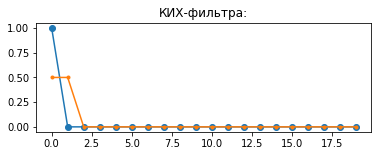

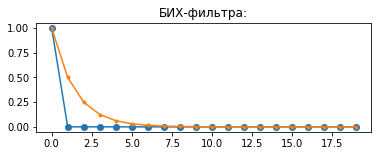

In [32]:
print("Импульсная характеристика:")
imp = np.array([0]*0+[1]+[0]*19)
fir_imp = FIR_filter(imp, [0.5, 0.5])
iir_imp = IIR_filter(imp, 0.5)
plt.figure(figsize=(6,2))
plt.title("КИХ-фильтра:")
plt.plot(imp, 'o-')
plt.plot(fir_imp, '.-')
plt.show()

plt.figure(figsize=(6,2))
plt.title("БИХ-фильтра:")
plt.plot(imp, 'o-')
plt.plot(iir_imp, '.-')
plt.show()

Переходная характеристика:


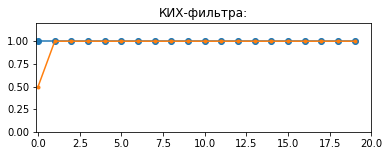

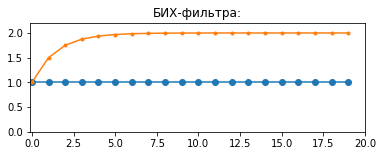

In [33]:
print("Переходная характеристика:")
ones = np.ones(20, dtype=float)
fir_ones = FIR_filter(ones, [0.5, 0.5])
iir_ones = IIR_filter(ones, 0.5)
plt.figure(figsize=(6,2))
plt.title("КИХ-фильтра:")
plt.axis([-0.1, 20, 0, 1.2])
plt.plot(ones, 'o-')
plt.plot(fir_ones, '.-')

plt.show()

plt.figure(figsize=(6,2))
plt.title("БИХ-фильтра:")
plt.plot(ones, 'o-')
plt.plot(iir_ones, '.-')
plt.axis([-0.1, 20, 0, 2.2])
plt.show()

## амплитудно-частотная и фазочастотная характеристик

амплитудно-частотная характеристика


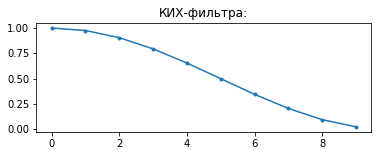

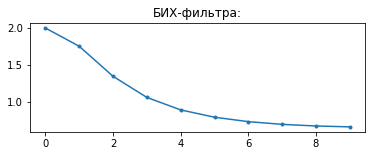

In [34]:
print("амплитудно-частотная характеристика")
fr_fir = scipy.fft.fft(fir_imp)
plt.figure(figsize=(6,2))
plt.title("КИХ-фильтра:")
#plt.axis([-0.1, 20, 0, 1.2])
plt.plot(fr_fir.real[:len(fr_fir)//2], '.-')

plt.show()

fr_iir = scipy.fft.fft(iir_imp)
plt.figure(figsize=(6,2))
plt.title("БИХ-фильтра:")

plt.plot(fr_iir.real[:len(fr_iir)//2], '.-')
#plt.axis([-0.1, 20, 0, 2.2])
plt.show()

Фазово-частотная характеристика


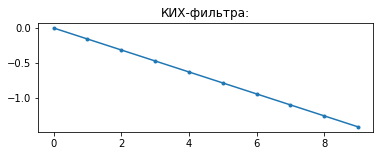

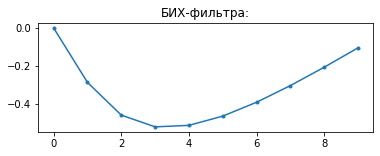

In [35]:
print("Фазово-частотная характеристика")
plt.figure(figsize=(6,2))
plt.title("КИХ-фильтра:")
#plt.axis([-0.1, 20, 0, 1.2])
phi_fir = np.arctan(fr_fir.imag / fr_fir.real)
np.nan_to_num(phi_fir, nan=np.pi/2)
plt.plot(phi_fir[:len(phi_fir)//2], '.-')

plt.show()

fr_iir = scipy.fft.fft(iir_imp)
plt.figure(figsize=(6,2))
plt.title("БИХ-фильтра:")
phi_iir = np.arctan(fr_iir.imag / fr_iir.real)
np.nan_to_num(phi_iir, nan=np.pi/2)
plt.plot(phi_iir[:len(phi_iir)//2], '.-')
#plt.axis([-0.1, 20, 0, 2.2])
plt.show()

Test params infinite impulse response alpha=[[0.01], [0.1], [0.5], [0.9], [0.99]]. finite impulse response alphas is [[[0.01, 0.99]], [[0.1, 0.9]], [[0.5, 0.5]], [[0.9, 0.1]], [[0.99, 0.01]]]
Единичный импульс
Фильтр КИХ-фильтр
Временная область


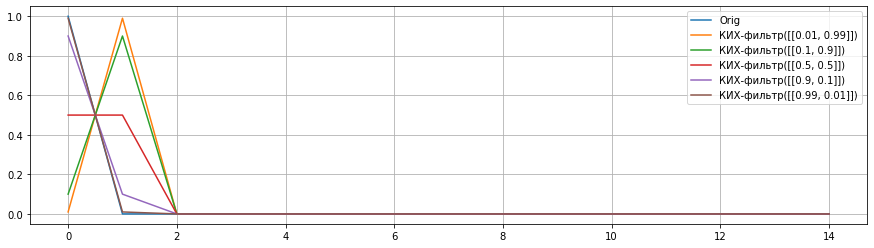

Амплитудный спектр


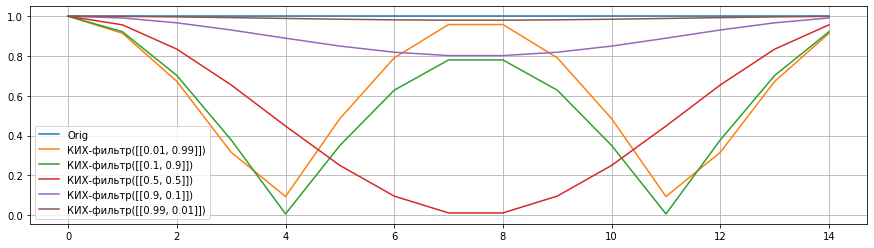

Фазовый спектр


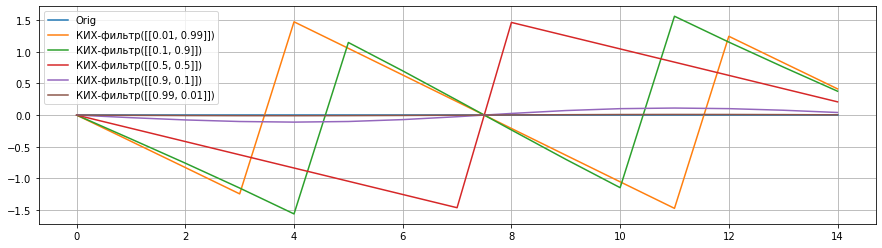

Фильтр БИХ-фильтр
Временная область


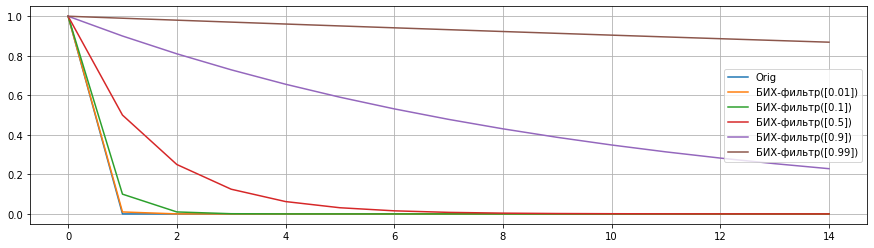

Амплитудный спектр


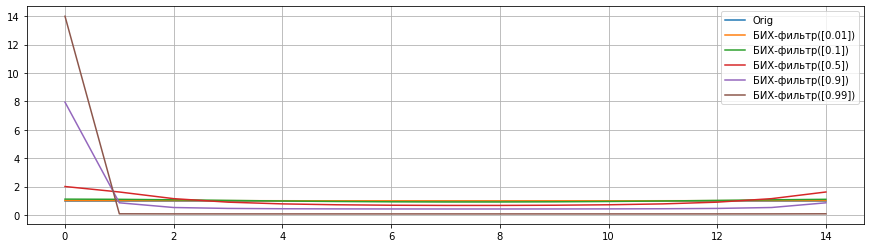

Фазовый спектр


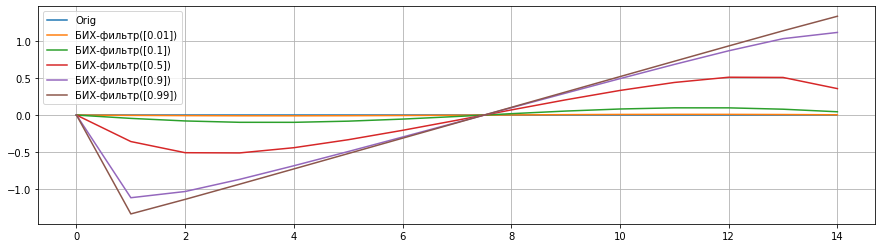

Единичный скачек
Фильтр КИХ-фильтр
Временная область


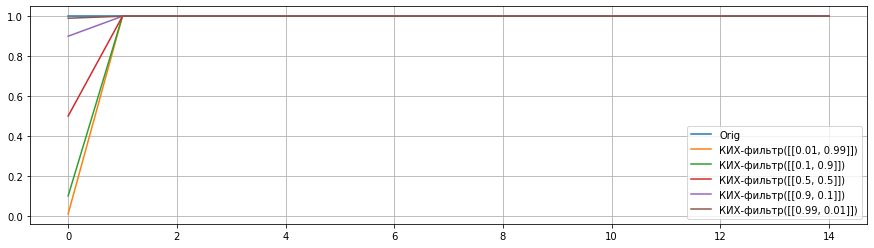

Амплитудный спектр


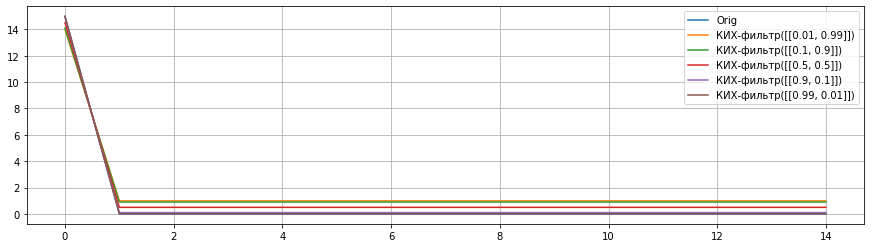

Фазовый спектр


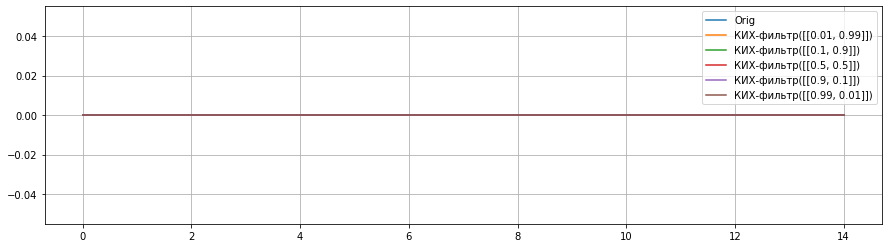

Фильтр БИХ-фильтр
Временная область


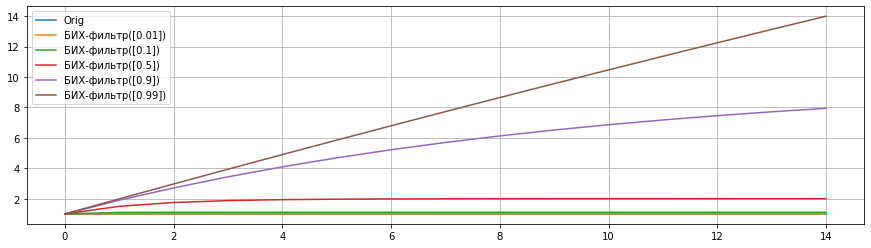

Амплитудный спектр


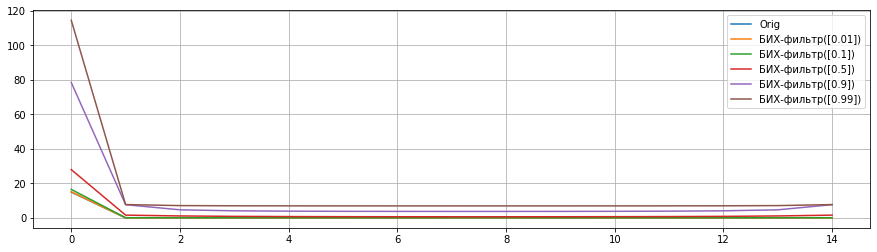

Фазовый спектр


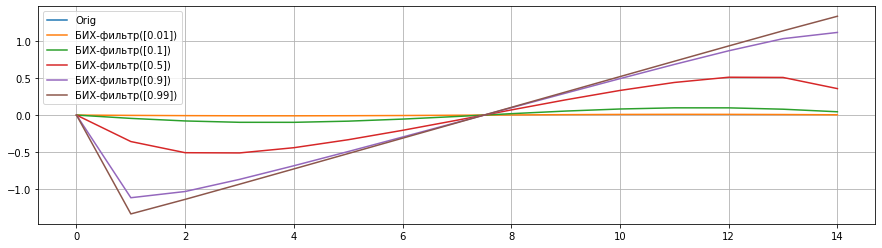

Cинус
Фильтр КИХ-фильтр
Временная область


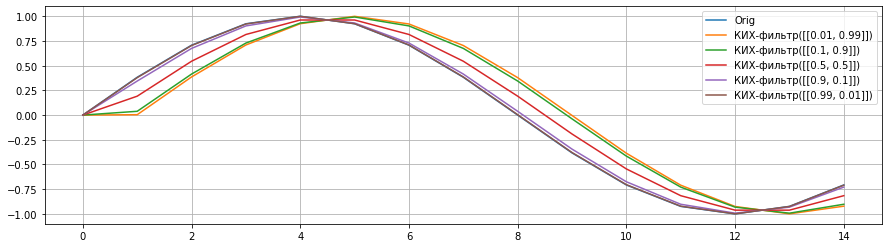

Амплитудный спектр


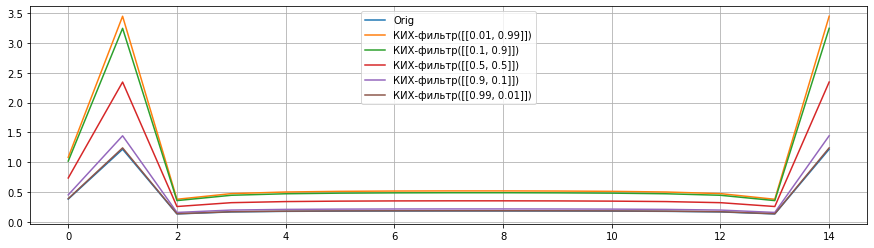

Фазовый спектр


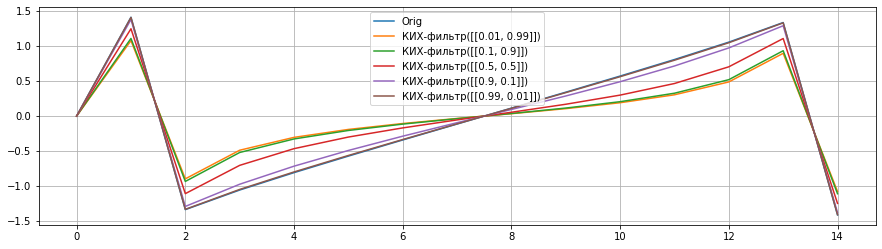

Фильтр БИХ-фильтр
Временная область


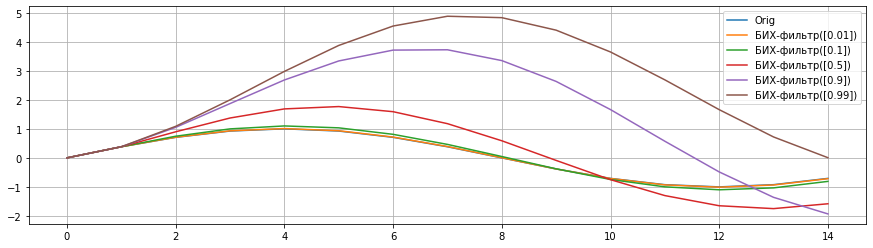

Амплитудный спектр


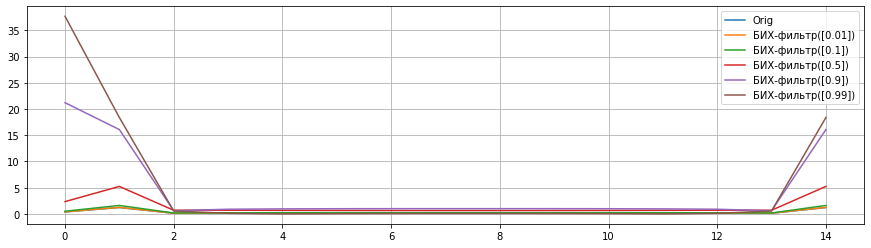

Фазовый спектр


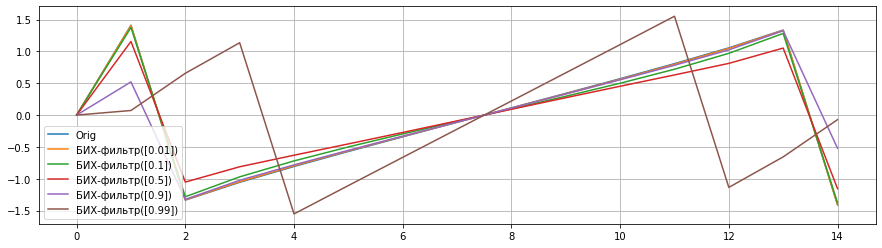

Шум
Фильтр КИХ-фильтр
Временная область


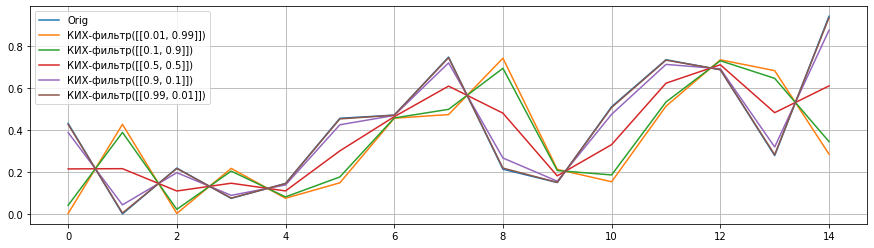

Амплитудный спектр


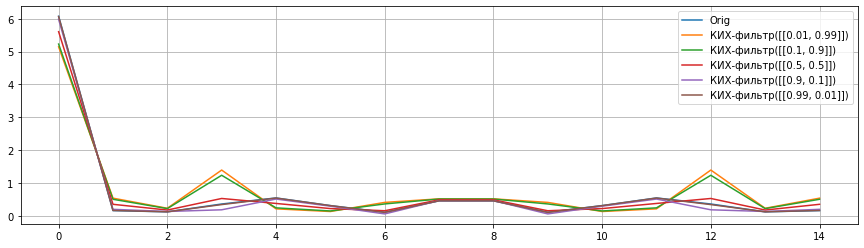

Фазовый спектр


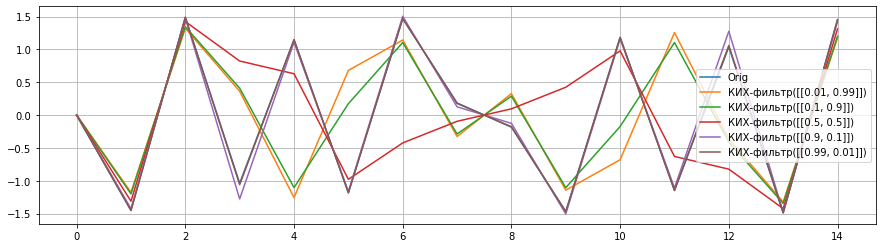

Фильтр БИХ-фильтр
Временная область


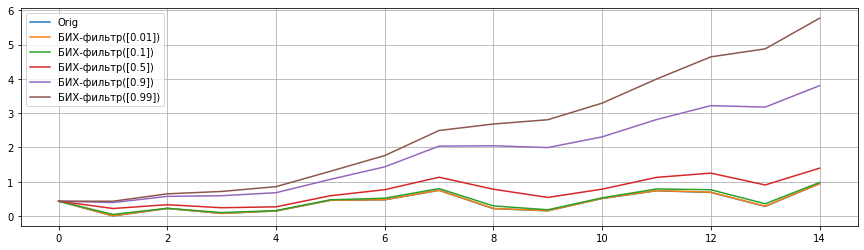

Амплитудный спектр


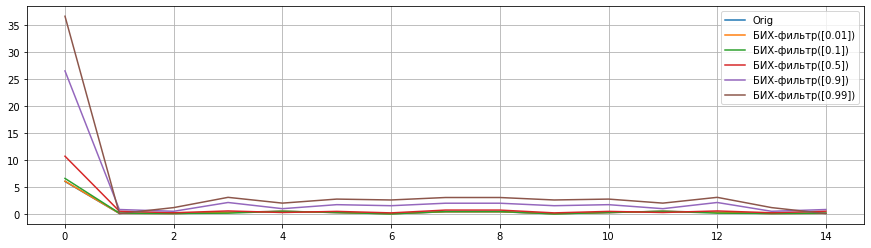

Фазовый спектр


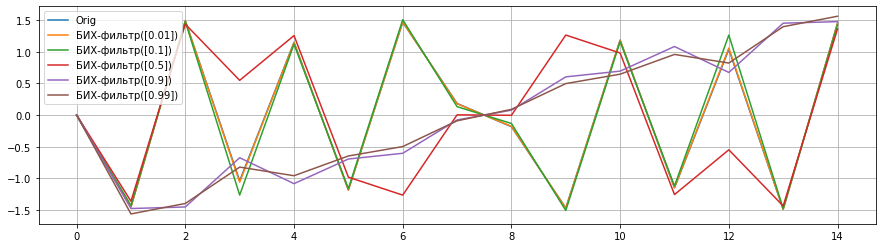

In [41]:
def draw_filter(f, x, filter_name,  params_list, spec_f=lambda x: x):
    plt.figure(figsize=(15,4))
    plt.grid(True)
    plt.plot(spec_f(x))
    for p in params_list:
        y_fir = spec_f(f(x, *p))
        plt.plot(y_fir)
    plt.legend(["Orig"] + [f"{filter_name}({param})" for param in params_list])
    plt.show()

def test_params(iir_alpha=[[0.01], [0.1], [0.5], [0.9], [0.99]], 
                fir_alphas=[[[0.01, 0.99]], [[0.1, 0.9]], [[0.5, 0.5]], [[0.9,0.1]], [[0.99, 0.01]]]):
    print(f"Test params infinite impulse response alpha={iir_alpha}. "
          f"finite impulse response alphas is {fir_alphas}")
    for name, x in test_signals.items():
        print(name)
        for f,n,p in zip([FIR_filter, IIR_filter],["КИХ-фильтр", "БИХ-фильтр"],[fir_alphas, iir_alpha]):
            print(f"Фильтр {n}")
            print("Временная область")
            draw_filter(f, x, n, params_list=p)
            print("Амплитудный спектр")
            draw_filter(f, x, n, spec_f=lambda x:get_spec(x)[0], params_list=p)
            print("Фазовый спектр")
            draw_filter(f, x, n, spec_f=lambda x:get_spec(x)[1], params_list=p)
        
    
test_params()

## Выводы:
При увеличении alpha для КИХ-фильтра пик плавно сдвигается в единицу. При увеличение alpha для БИХ-фильтра, единичный сигнал становится более сграженным. При увеличении alpha для БИХ-фильтра сигнал из прямой превращается в асимптотичеки возростающий до значения 1/alpha. Для синусоиды не меняется основная частота, до добавляется сглаживание.  